## 1. 라벨 잘못 기입한 경우 변경

In [33]:
# 폴더 목록 리스트로 가져오기
import os

files = os.listdir('./label_imgs_data_fix/')
files = files[1:] ## classes.txt는 제외

for file in files:
    text_file_path = './label_imgs_data_fix/' + file
    new_text_content = ''
    with open(text_file_path,'r') as f:
        lines = f.readlines()
        for line in lines:
            flag = line.split(" ")[0]
            
            if flag == '0': # 짜장면 0 -> 12
                new_string = '12' + line[1:]

            elif flag == '1': # 짬뽕 1 -> 13
                new_string = '13' + line[1:]

            elif flag == '2': # 탕수육 2 -> 14
                new_string = '14' + line[1:]

            if new_string:
                new_text_content += new_string

    with open(text_file_path,'w') as f:
        f.write(new_text_content)

### 초과 라벨 제거

In [1]:
# 폴더 목록 리스트로 가져오기
import os

files = os.listdir('../Data_total/total_labels/')
files = files[1:] ## classes.txt는 제외

for file in files:
    text_file_path = '../Data_total/total_labels/' + file
    new_text_content = ''
    with open(text_file_path,'r') as f:
        lines = f.readlines()
        for line in lines:
            flag = line.split(" ")[0]
            
            if int(flag) >= 15: 
                new_string = ''
                
            else:
                new_string = new_text_content + line

            if new_string:
                new_text_content += new_string

    with open(text_file_path,'w') as f:
        f.write(new_text_content)

## 2. 이미지 파일 및 라벨 파일 이름 통일

In [25]:
import re

string = 'aaa1234, ^&*2233pp'
numbers = re.sub(r'[^0-9]', '', string)
print(numbers)

12342233


In [10]:
import os
import re
from glob import glob

default_dir = '../../../Desktop/image/치킨'
folder_list = glob(default_dir+'*')
for folder in folder_list:
    pre_name = folder.split('\\')[1]
    
    print(pre_name)
    print(' ')
    new_name = 'chicken'
    print(default_dir + pre_name)
    print(' ')
    print(default_dir + new_name)
    #os.rename(default_dir + pre_name, default_dir+new_name)

치킨
 
../../../Desktop/image/치킨치킨
 
../../../Desktop/image/치킨chicken


In [25]:
import os
import re

default_dir = '../../../Desktop/image/Sweet_and_sour_pork/'
img_list = glob(default_dir+'*탕수육*')
for img in img_list:
    pre_name = img.split('\\')[1]
    num = re.sub(r'[^0-9]', '', pre_name)
    new_name = 'Sweet_and_sour_pork'+num+'.jpg'
    os.rename(default_dir + pre_name, default_dir+new_name)

In [36]:
import os
import re

default_dir = '../../../Desktop/label_imgs_data_fix/'
txt_list = glob(default_dir+'*탕수육*')
for txt in txt_list:
    pre_name = txt.split('\\')[1]
    num = re.sub(r'[^0-9]', '', pre_name)
    new_name = 'Sweet_and_sour_pork'+num+'.txt'
    #print(f'{pre_name}, {num}, {new_name}')
    os.rename(default_dir + pre_name, default_dir+new_name)

## 3. Yolo 학습 데이터 셋 만들기
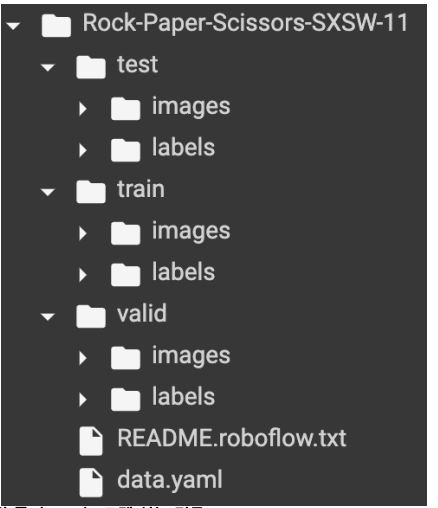

In [1]:
def create_folder(directory):
    import os
    
    if not os.path.exists(directory):
        os.mkdir(directory)

In [2]:
import os
import shutil

#--------- target Dateset
target_dataset_dir = '../Data_total/'

#--------- 데이터 저장할 경로 지정
dir_name = 'fit_dataset'

#fit_dataset_dir = '../Data/fit_dataset_with_code'
fit_dataset_dir = os.path.join(target_dataset_dir, dir_name)
create_folder(fit_dataset_dir)


#--------- train,valid,test 폴더로 분리
train_dir = os.path.join(fit_dataset_dir, 'train')
create_folder(train_dir)

validation_dir = os.path.join(fit_dataset_dir, 'validation')
create_folder(validation_dir)

#test_dir = os.path.join(fit_dataset_dir, 'test')
#create_folder(test_dir)

#--------- 각 폴더에 images/ lebels 폴더로 분리
data_table = ['images','labels'] 

for table in data_table:
    create_folder(os.path.join(train_dir, table))
    create_folder(os.path.join(validation_dir, table))
    #create_folder(os.path.join(test_dir, table))

## 4. 학습 데이터 구조대로 파일 분류

```
라벨링 txt 파일 -> train/labels 
                -> validation/labels
                
라벨링 txt 파일 기준으로 

원본 이미지 파일  -> train/images 
                  -> validation/images
```

In [3]:
import os
from glob import glob

target_class = os.listdir('../Data_total/total_imgs/')
print(target_class)

['bossam', 'burger', 'chicken', 'dduckbokki', 'gimbab', 'Jajangmyeon', 'Jjambbong', 'juck', 'pizza', 'pork_cutlet', 'pork_feet', 'salad', 'sandwich', 'sushi', 'Sweet_and_sour_pork']


In [4]:
import os
import shutil
from glob import glob

#--------- 데이터 클래스 리스트
target_class = os.listdir('../Data_total/total_imgs/')


#--------- 폴더 경로 지정 및 학습데이터셋 폴더 만들기
origin_img_dir = '../Data_total/total_imgs/'             # 원본 이미지 폴더 경로, 
after_labeling_dir = '../Data_total/total_labels/'       # 라벨링 폴더 경로,
fit_dataset_dir = '../Data_total/fit_dataset/'           # 학습데이터 폴더 경로


for cls in target_class:
    cls_label_dir = glob(after_labeling_dir + cls +'*')
    
    valid_ratio = int(len(cls_label_dir)*0.2)
    
    train_set = cls_label_dir[:-valid_ratio]
    valid_set = cls_label_dir[-valid_ratio:]

    for train_labels in train_set:
        txt_file = train_labels.split('\\')[1]
        destination = fit_dataset_dir + 'train/labels/' + txt_file
        shutil.copyfile(train_labels, destination)
        
        origin_img = origin_img_dir + cls + '/' + txt_file[:-4]+'.jpg'
        destination_img = fit_dataset_dir + 'train/images/' + txt_file[:-4]+'.jpg'
        shutil.copyfile(origin_img, destination_img)

    for valid_labels in valid_set:
        txt_file = valid_labels.split('\\')[1]
        destination = fit_dataset_dir + '/validation/labels/' + txt_file
        shutil.copyfile(valid_labels, destination)
    
        origin_img = origin_img_dir + cls + '/' + txt_file[:-4]+'.jpg'
        destination_img = fit_dataset_dir + 'validation/images/' + txt_file[:-4]+'.jpg'
        shutil.copyfile(origin_img, destination_img)
    
    print(f'{cls} 데이터 분리 완료')

bossam 데이터 분리 완료
burger 데이터 분리 완료
chicken 데이터 분리 완료
dduckbokki 데이터 분리 완료
gimbab 데이터 분리 완료
Jajangmyeon 데이터 분리 완료
Jjambbong 데이터 분리 완료
juck 데이터 분리 완료
pizza 데이터 분리 완료
pork_cutlet 데이터 분리 완료
pork_feet 데이터 분리 완료
salad 데이터 분리 완료
sandwich 데이터 분리 완료
sushi 데이터 분리 완료
Sweet_and_sour_pork 데이터 분리 완료


## 4. 학습데이터 구조대로 분리 되었나 확인

In [5]:
import os
train_imgs = os.listdir('../Data_total/fit_dataset/train/images/')[:3]
train_labels = os.listdir('../Data_total/fit_dataset/train/labels/')[:3]

valid_imgs = os.listdir('../Data_total/fit_dataset/validation/images/')[:3]
valid_labels = os.listdir('../Data_total/fit_dataset/validation/labels/')[:3]

print(train_imgs)
print(train_labels)

print(valid_imgs)
print(valid_labels)

['bossam1.jpg', 'bossam10.jpg', 'bossam100.jpg']
['bossam1.txt', 'bossam10.txt', 'bossam100.txt']
['bossam77.jpg', 'bossam78.jpg', 'bossam80.jpg']
['bossam77.txt', 'bossam78.txt', 'bossam80.txt']


### yaml 파일 만들기

In [4]:
food_labels =  {
    0: 'chicken',
    1: 'pizza',
    2: 'burger',
    3: 'pork_cutlet',
    4: 'sandwich',
    5: 'sushi',
    6: 'salad',
    7: 'pork_feet',
    8: 'juck',
    9: 'bossam',
    10: 'gimbab',
    11: 'dduckbokki',
    12: 'Jajangmyeon',
    13: 'Jjambbong',
    14: 'Sweet_and_sour_pork',
}

In [5]:
import os
import yaml

file_name = 'food_fit'

nowfolder_len = len(os.getcwd().split('\\')[-1])
abs_dir = str(os.getcwd()).replace('\\','/')[:-nowfolder_len]
default_dir = '../Data_total/fit_dataset/'

train_path = abs_dir+default_dir[3:]+'train/images/'
val_path = abs_dir+default_dir[3:]+'validation/images/'

data = {'train' : train_path,
        'val' : val_path,
        'names' : list(food_labels.values()),
        'nc' : len(food_labels) }

yaml_dir = default_dir + file_name+'.yaml'

with open(yaml_dir, 'w') as f:
    yaml.dump(data, f)

with open(yaml_dir, 'r') as f:
    yogiyo_yaml = yaml.safe_load(f)
    display(yogiyo_yaml)

{'names': ['chicken',
  'pizza',
  'burger',
  'pork_cutlet',
  'sandwich',
  'sushi',
  'salad',
  'pork_feet',
  'juck',
  'bossam',
  'gimbab',
  'dduckbokki',
  'Jajangmyeon',
  'Jjambbong',
  'Sweet_and_sour_pork'],
 'nc': 15,
 'train': 'C:/Users/3sp39/Documents/DL_project/Data_total/fit_dataset/train/images/',
 'val': 'C:/Users/3sp39/Documents/DL_project/Data_total/fit_dataset/validation/images/'}

## 5. 학습하기

In [6]:
from ultralytics import YOLO

In [7]:
model = YOLO("yolov8n.pt") 
model.to('cuda')
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [8]:
## model.train(data='../Data_total/fit_dataset/food_test.yaml', epochs=30, ) #data.yaml파일이 위치하는 경로

file_name = 'yolov8_fit_e100_v6'
data_path = '../Data_total/fit_dataset/food_fit.yaml'
n_epochs = 100
bs = 16
n_workers = bs
gpu_id = 0
verbose = True
rng = 0
validate = True
patience = 0
project = '../Data_total/fit_logs/'

results = model.train(
    data=data_path,
    epochs=n_epochs,
    batch=bs,
    verbose=verbose,
    imgsz=640,
    project=project,
    name=file_name,
    optimizer='AdamW',
    dropout=0.2
    #device=gpu_id,
    #seed=rng,
    #val=validate,
    #workers=n_workers,
    #patience=patience
)


New https://pypi.org/project/ultralytics/8.0.202 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../Data_total/fit_dataset/food_fit.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=../Data_total/fit_logs/, name=yolov8_fit_e100_v62, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

      6/100      2.16G      1.114      2.359      1.483         27        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361      0.108      0.303       0.14      0.092

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100      2.16G      1.098      2.272      1.484         39        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361      0.214      0.244     0.0985     0.0649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/100      2.16G      1.066       2.28      1.442         23        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P         

     26/100      2.16G     0.8527      1.685      1.288         24        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361      0.367        0.5        0.4      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/100      2.16G     0.8381      1.655      1.272         28        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361      0.543      0.491      0.475      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/100      2.16G     0.8148      1.602      1.265         29        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P         

     46/100      2.16G     0.7038      1.216       1.19         32        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361      0.516      0.546      0.557      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/100      2.16G     0.6942      1.191      1.196         29        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361      0.598      0.586      0.625       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/100      2.16G     0.7187      1.191      1.189         31        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P         

     66/100      2.15G     0.6379     0.9627       1.14         25        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361      0.715      0.644      0.727      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     67/100      2.15G     0.6389     0.9485       1.14         30        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361      0.709      0.584      0.682      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     68/100      2.15G     0.6171     0.8906      1.132         29        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P         

     86/100      2.16G      0.555     0.7246      1.087         25        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361      0.713      0.729      0.768      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     87/100      2.15G     0.5472     0.7065      1.089         26        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01
                   all        312        361       0.74       0.71      0.767      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     88/100      2.16G     0.5417     0.7195      1.075         27        640: 100%|██████████| 79/79 [00:08<00:00,  9.
                 Class     Images  Instances      Box(P         

## 학습 모델로 test

- yolo 명령어 사용시
```
#결과를 저장하지 않기
!yolo task=detect mode=predict model={model_path}/best.pt source={test_image}

#결과를 저장하기
!yolo task=detect mode=predict model={model_path}/best.pt source={test_image} \
 save=true save_txt=true

#camera를 쓰려면 source=0
#save는 모델을 적용한 source파일을 label이 붙은 박스 이미지로 저장
#save_txt는 label과 박스의 코너 좌표값이 기록된 텍스트 파일로 저장
```

- YOLO객체 사용시
    - model = YOLO(학습모델경로)

In [11]:
#from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
mymodel = YOLO('../Data_total/fit_logs/yolov8_fit_e100_v62/weights/best.pt')
mymodel.to('cuda')

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s


image 1/1 C:\Users\3sp39\Documents\DL_project\Code\..\Data_some(test)\test_sample\test1.jpg: 320x640 1 pork_cutlet, 66.8ms
Speed: 0.0ms preprocess, 66.8ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)


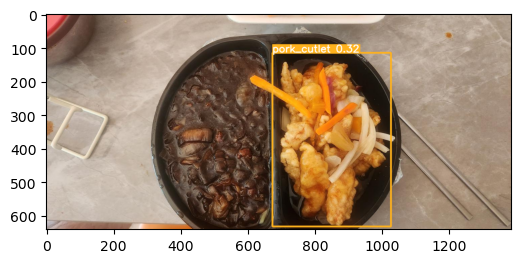


image 1/1 C:\Users\3sp39\Documents\DL_project\Code\..\Data_some(test)\test_sample\test2.jpg: 384x640 1 Jajangmyeon, 1 Sweet_and_sour_pork, 66.1ms
Speed: 2.8ms preprocess, 66.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


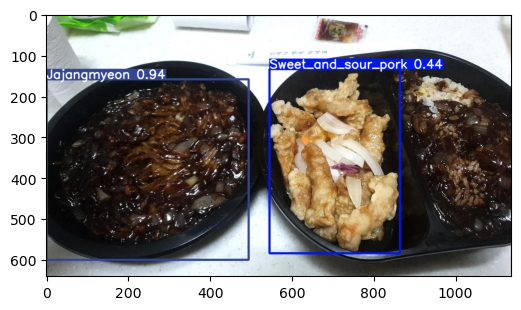


image 1/1 C:\Users\3sp39\Documents\DL_project\Code\..\Data_some(test)\test_sample\test3.jpg: 640x480 1 Jajangmyeon, 1 Jjambbong, 63.8ms
Speed: 3.2ms preprocess, 63.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


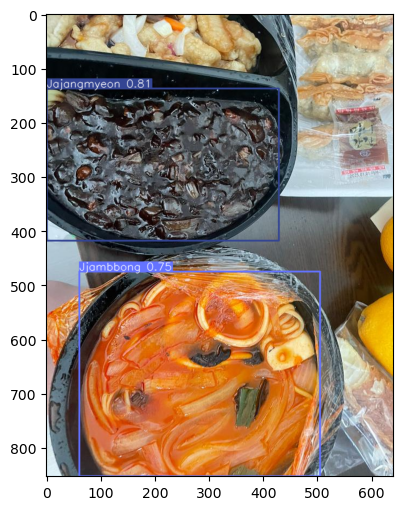

In [12]:
## cv2로 plot -> 새창이 열림
#plots = results[0].plot()
#cv2.imshow("plot", plots)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

from glob import glob

test_imgs = glob('../Data_some(test)/test_sample/*')

for img in test_imgs:
    results = mymodel.predict(img)
    plots = results[0].plot()
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(plots, cv2.COLOR_BGR2RGB))
    plt.show();

In [21]:
## Yolo 명령어로 예측 후 저장
#!yolo task=detect mode=predict model={./runs/detect/train2/weights}best.pt source= '../da'